Theses Project Experiment with ResNet-50 Model

Submitted by Himanshu Gupta

In [ ]:
import pandas as pd
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
%matplotlib inline
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from matplotlib import pyplot

# Data Processing 
import os
import os.path
import random
import PIL
import glob
from PIL import Image # to read images
#
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


In [ ]:
#For Keras model
import keras

from keras.optimizers import SGD
from keras.models import Sequential,Model
from keras.applications import ResNet50
from keras.layers import Dense, Dropout, Flatten, Activation, BatchNormalization, Input
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from keras.utils import to_categorical
from keras.preprocessing import image
from keras import backend as k
import tensorflow as tf
from tensorflow.python.keras.optimizers import TFOptimizer
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


### Dataset Path 

In [ ]:
# Initial Dataset Path
initial_data_path = "/content/drive/My Drive/data/"
initial_data_csv_path = "/content/drive/My Drive/InitialData.csv"

# Augmented Data Path
data_path = "/content/drive/My Drive/trainDataTACO/"
final_data_csv_path = "/content/drive/My Drive/FinalData.csv"

In [ ]:
def create_data(df , path):
  train_data = []  
  for ind in df.index:
      img=Image.open(os.path.join(path+ df['filename'][ind]))
      img = img.resize((128, 128), Image.ANTIALIAS)
      img = image.img_to_array(img)
      # Append image
      train_data.append(img)

  # Create data arrays
  X = np.array(train_data)
  # Create dummy variables
  df = pd.get_dummies(df, columns=["category"])
  y = np.array(df.drop(['filename'],axis=1))

  # Here I split original training data to sub-training (80%) and testing data (20%)
  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13, test_size=0.2, stratify=y)

  return (X_train, X_test, y_train, y_test)

ResNet Model Initialisation

In [ ]:
def create_model():
  model = Sequential()
  model.add(ResNet50(include_top = False, pooling = 'avg', weights = 'imagenet'))
  # Second layer added for dropout
  model.add(keras.layers.Dropout(0.3))
  # Third layer as Dense for output 5-class classification
  model.add(Dense(5, activation = 'softmax'))
  # No need to train first layer (ResNet) model as it is already trained
  model.layers[0].trainable = False
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
 # Early Stopping Parameter
cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 50)

Model 1 implementation

In [ ]:
df1 = pd.read_csv(initial_data_csv_path)
df1 = df1.drop(['x_min','x_max','y_min','y_max'], axis=1)
# Create Data   
print("Generating data........")
(X_train, X_test, y_train, y_test) = create_data(df1 ,initial_data_path)
# Check the data size
X_train.shape, X_test.shape, y_train.shape, y_test.shape

Generating data........


((644, 128, 128, 3), (161, 128, 128, 3), (644, 5), (161, 5))

In [ ]:
model_1 = create_model() # Call ResNet Model Object
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 10245     
Total params: 23,597,957
Trainable params: 10,245
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
# Model fit
history = model_1.fit(X_train, y_train, epochs=100, batch_size=50, validation_split=0.20, callbacks = [cb_early_stopper])

Epoch 1/100
11/11 [==============================] - 2s 227ms/step - loss: 2.3583 - accuracy: 0.2058 - val_loss: 1.8466 - val_accuracy: 0.2481
Epoch 2/100
11/11 [==============================] - 1s 129ms/step - loss: 1.8987 - accuracy: 0.3126 - val_loss: 1.5621 - val_accuracy: 0.3953
Epoch 3/100
11/11 [==============================] - 1s 127ms/step - loss: 1.5788 - accuracy: 0.4097 - val_loss: 1.6591 - val_accuracy: 0.4031
Epoch 4/100
11/11 [==============================] - 1s 127ms/step - loss: 1.4152 - accuracy: 0.4291 - val_loss: 1.5729 - val_accuracy: 0.3643
Epoch 5/100
11/11 [==============================] - 1s 129ms/step - loss: 1.3579 - accuracy: 0.4641 - val_loss: 1.6447 - val_accuracy: 0.3876
Epoch 6/100
11/11 [==============================] - 1s 129ms/step - loss: 1.1768 - accuracy: 0.5223 - val_loss: 1.6287 - val_accuracy: 0.4186
Epoch 7/100
11/11 [==============================] - 1s 129ms/step - loss: 1.0656 - accuracy: 0.5825 - val_loss: 1.6364 - val_accuracy: 0.4651

In [ ]:
# evaluate the model
_, train_acc = model_1.evaluate(X_train, y_train)
_, test_acc = model_1.evaluate(X_test, y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

6/6 [==============================] - 1s 103ms/step - loss: 2.2451 - accuracy: 0.4037
Train: 0.868, Test: 0.404


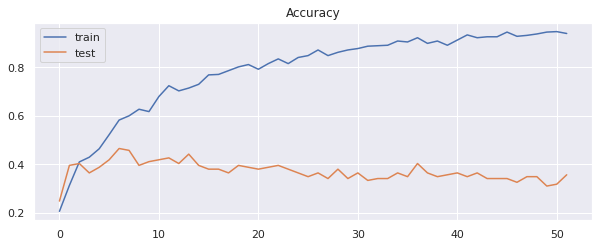

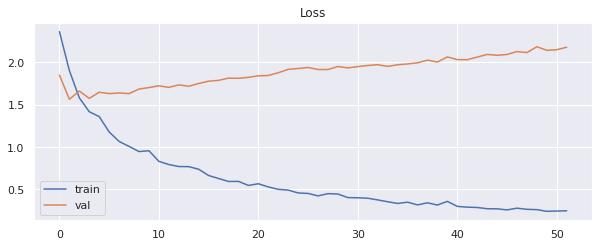

In [ ]:

# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# plot loss during training
pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='val')
pyplot.legend()


# **Model implementation on Augmented Data**

In [ ]:
df2 = pd.read_csv(final_data_csv_path)
# Create Data   
print("Generating data........")
(x_train, x_test, Y_train, Y_test) = create_data(df2 ,data_path)
# Check the data size
x_train.shape, x_test.shape, Y_train.shape, Y_test.shape

Generating data........


((2753, 128, 128, 3), (689, 128, 128, 3), (2753, 5), (689, 5))

In [ ]:
model_2 = create_model() # Call ResNet Model Object
# Model fit
history_2 = model_2.fit(x_train, Y_train, epochs=100, batch_size=50, validation_split=0.20, callbacks = [cb_early_stopper])

Epoch 1/100
45/45 [==============================] - 8s 172ms/step - loss: 1.3836 - accuracy: 0.5304 - val_loss: 0.8568 - val_accuracy: 0.6878
Epoch 2/100
45/45 [==============================] - 6s 140ms/step - loss: 0.7709 - accuracy: 0.7103 - val_loss: 0.6592 - val_accuracy: 0.7550
Epoch 3/100
45/45 [==============================] - 6s 140ms/step - loss: 0.6066 - accuracy: 0.7661 - val_loss: 0.6045 - val_accuracy: 0.7731
Epoch 4/100
45/45 [==============================] - 6s 139ms/step - loss: 0.5108 - accuracy: 0.8115 - val_loss: 0.5748 - val_accuracy: 0.7967
Epoch 5/100
45/45 [==============================] - 6s 140ms/step - loss: 0.4519 - accuracy: 0.8333 - val_loss: 0.5423 - val_accuracy: 0.8113
Epoch 6/100
45/45 [==============================] - 6s 140ms/step - loss: 0.4073 - accuracy: 0.8456 - val_loss: 0.5238 - val_accuracy: 0.8221
Epoch 7/100
45/45 [==============================] - 6s 140ms/step - loss: 0.3875 - accuracy: 0.8492 - val_loss: 0.5041 - val_accuracy: 0.8203

In [ ]:
# Evaluate the model on test Data
_, train_acc = model_2.evaluate(x_train, Y_train)
_, test_acc = model_2.evaluate(x_test, Y_test)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

22/22 [==============================] - 2s 94ms/step - loss: 0.3670 - accuracy: 0.8824
Train: 0.973, Test: 0.882


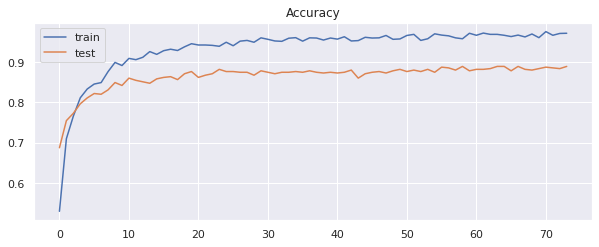

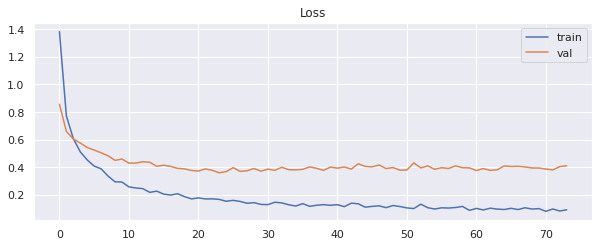

In [ ]:
# plot accuracy during training
pyplot.subplot(211)
pyplot.title('Accuracy')
pyplot.plot(history_2.history['accuracy'], label='train')
pyplot.plot(history_2.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

# plot loss during training
pyplot.subplot(212)
pyplot.title('Loss')
pyplot.plot(history_2.history['loss'], label='train')
pyplot.plot(history_2.history['val_loss'], label='val')
pyplot.legend()


Use K-Fold technique to cross validate

In [ ]:
model = KerasClassifier(build_fn = create_model, epochs=50, batch_size=50, verbose=1)
kfold = KFold(n_splits=5, shuffle=True, random_state=13)
results = cross_val_score(model, x_train, Y_train, cv = kfold, verbose=10, n_jobs = -1)

In [ ]:
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Baseline: nan% (nan%)
